In [77]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [78]:
gdp_df = pd.read_csv('../data/gdp_percapita.csv')

In [79]:
gdp_df

,Country or Area,Year,Value,Value Footnotes
0,Afghanistan,2021,1517.016266,NaN
1,Afghanistan,2020,1968.341002,NaN
2,Afghanistan,2019,2079.921861,NaN
3,Afghanistan,2018,2060.698973,NaN
4,Afghanistan,2017,2096.093111,NaN
...,...,...,...,...
7657,Zimbabwe,1994,2670.106615,NaN
7658,Zimbabwe,1993,2458.783255,NaN
7659,Zimbabwe,1992,2468.278257,NaN
7660,Zimbabwe,1991,2781.787843,NaN


In [80]:
gdp_df.head()

,Country or Area,Year,Value,Value Footnotes
0,Afghanistan,2021,1517.016266,NaN
1,Afghanistan,2020,1968.341002,NaN
2,Afghanistan,2019,2079.921861,NaN
3,Afghanistan,2018,2060.698973,NaN
4,Afghanistan,2017,2096.093111,NaN


# Q5

# How many rows and columns are in gdp_df? What are the data types of each column?

In [81]:
#Looking at how many rows and columns are in gdp_df.
gdp_df.shape

(7662, 4)

In [82]:
#looking at info.
gdp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7662 entries, 0 to 7661
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Country or Area  7662 non-null   object 
 1   Year             7662 non-null   int64  
 2   Value            7662 non-null   float64
 3   Value Footnotes  0 non-null      float64
dtypes: float64(2), int64(1), object(1)
memory usage: 239.6+ KB


# Answer: 7662 rows x 4 columns, data types: object, int64, float64

# Q6

# Drop the Value Footnotes column and rename the remaining three to 'Country', 'Year', and 'GDP_Per_Capita'.

In [83]:
#Dropping the Value Footnotes column.
del gdp_df['Value Footnotes']

In [84]:
#Renaming columns to Country, Year, and GDP_Per_Capita.
gdp_df.columns = ['Country', 'Year', 'GDP_Per_Capita']

In [85]:
gdp_df.head()

,Country,Year,GDP_Per_Capita
0,Afghanistan,2021,1517.016266
1,Afghanistan,2020,1968.341002
2,Afghanistan,2019,2079.921861
3,Afghanistan,2018,2060.698973
4,Afghanistan,2017,2096.093111


In [86]:
print(gdp_df)

          Country  Year  GDP_Per_Capita
0     Afghanistan  2021     1517.016266
1     Afghanistan  2020     1968.341002
2     Afghanistan  2019     2079.921861
3     Afghanistan  2018     2060.698973
4     Afghanistan  2017     2096.093111
...           ...   ...             ...
7657     Zimbabwe  1994     2670.106615
7658     Zimbabwe  1993     2458.783255
7659     Zimbabwe  1992     2468.278257
7660     Zimbabwe  1991     2781.787843
7661     Zimbabwe  1990     2704.757299

[7662 rows x 3 columns]


# Answer: Used gdp_df.columns = ['Country', 'Year', 'GDP_Per_Capita'] to change column names.

# Q7

# How many countries have data for all years? Which countries are missing many years of data? Look at the number of observations per year. What do you notice?

In [87]:
#How many countries have data for all years? - Not right
gdp_df.count()

Country           7662
Year              7662
GDP_Per_Capita    7662
dtype: int64

In [88]:
#how many unique years
gdp_df['Year'].nunique()

33

In [89]:
#Which countries are missing many years of data? - Not right
print(gdp_df.isnull().sum())

Country           0
Year              0
GDP_Per_Capita    0
dtype: int64


# "group by" and get a count of years.

In [90]:
grouped_countries = gdp_df.groupby(["Country"]).count().sort_values("Year")

In [91]:
grouped_countries.head()

,Year,GDP_Per_Capita
Country,,
Djibouti,10,10
Somalia,10,10
Turks and Caicos Islands,12,12
Sint Maarten (Dutch part),14,14
Kosovo,15,15


In [92]:
grouped_countries

,Year,GDP_Per_Capita
Country,,
Djibouti,10,10
Somalia,10,10
Turks and Caicos Islands,12,12
Sint Maarten (Dutch part),14,14
Kosovo,15,15
...,...,...
Jamaica,33,33
Japan,33,33
Jordan,33,33


In [93]:
# Number of countries that have data for all years
print((grouped_countries[grouped_countries['Year'] == 33]))
len(grouped_countries[grouped_countries['Year'] == 33])

                             Year  GDP_Per_Capita
Country                                          
Papua New Guinea               33              33
Pakistan                       33              33
Australia                      33              33
Pacific island small states    33              33
Austria                        33              33
...                           ...             ...
Jamaica                        33              33
Japan                          33              33
Jordan                         33              33
IDA total                      33              33
Zimbabwe                       33              33

[202 rows x 2 columns]


202

In [94]:
# Number of countries that don't have data for all years.
print((grouped_countries[grouped_countries['Year'] != 33]))
len(grouped_countries[grouped_countries['Year'] != 33])

                           Year  GDP_Per_Capita
Country                                        
Djibouti                     10              10
Somalia                      10              10
Turks and Caicos Islands     12              12
Sint Maarten (Dutch part)    14              14
Kosovo                       15              15
Cayman Islands               16              16
Nauru                        19              19
Afghanistan                  20              20
CuraÃ§ao                     22              22
Palau                        22              22
SÃ£o TomÃ© and Principe      22              22
Qatar                        23              23
Other small states           23              23
Timor-Leste                  23              23
Liberia                      23              23
Libya                        24              24
San Marino                   25              25
Small states                 26              26
Montenegro                   26         

40

# Answer: 202 countries have data for all years and 40 do not.

# Q8

# In this question, you're going to create some plots to show the distribution of GDP per capita for the year 2020. Go to the Python Graph Gallery (https://www.python-graph-gallery.com/) and look at the different types of plots under the Distribution section. Create a histogram, a density plot, a boxplot, and a violin plot. What do you notice when you look at these plots? How do the plots compare and what information can you get out of one type that you can't necessarily get out of the others?

In [95]:
#create gdp_df2020
gdp_df2020 = gdp_df[gdp_df["Year"] == 2020]

C:\Users\mcnut\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


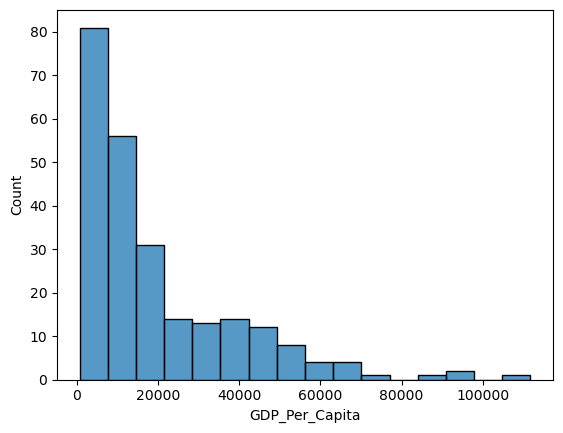

In [96]:
#creating a histogram
sns.histplot(data=gdp_df2020, x = "GDP_Per_Capita")
plt.show()

In [97]:
#creating a density plot

C:\Users\mcnut\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


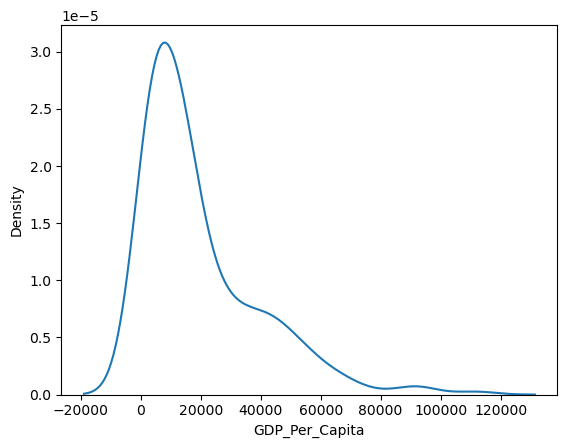

In [98]:
sns.kdeplot(gdp_df2020['GDP_Per_Capita'])
plt.show()

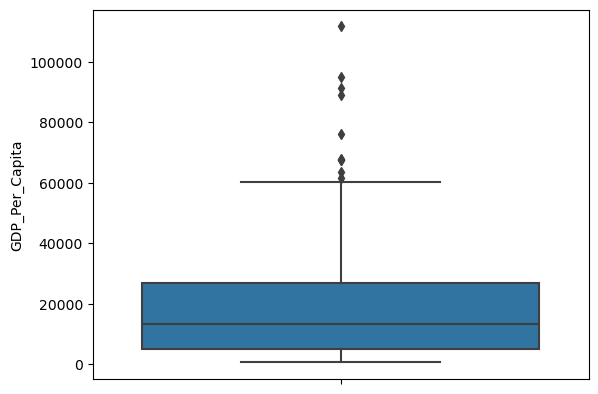

In [99]:
#creating a box plot
sns.boxplot(y=gdp_df2020['GDP_Per_Capita'])
plt.show()

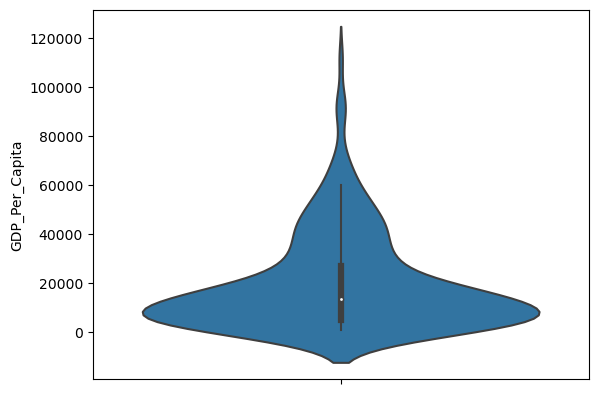

In [100]:
#creating a violin plot
sns.violinplot(y=gdp_df2020["GDP_Per_Capita"])
plt.show()

# Answer: Most countries seem to have a GDP Per Capita of less than 20,000.

# Q9

# What was the median GDP per capita value in 2020?

In [101]:
# what is the median GDP per capita value in 2020
gdp_per_cap2020 = gdp_df[gdp_df["Year"] == 2020]
gdp_per_cap2020["GDP_Per_Capita"].median()

13357.997573370474

# Answer: 13358

# Q10

# For this question, you're going to create some visualizations to compare GDP per capita values for the years 1990, 2000, 2010, and 2020. Start by subsetting your data to just these 4 years into a new DataFrame named gdp_decades. Using this, create the following 4 plots:

A boxplot
A barplot (check out the Barplot with Seaborn section: https://www.python-graph-gallery.com/barplot/#Seaborn)
A scatterplot
A scatterplot with a trend line overlaid (see this regplot example: https://www.python-graph-gallery.com/42-custom-linear-regression-fit-seaborn)
Comment on what you observe has happened to GDP values over time and the relative strengths and weaknesses of each type of plot.

In [102]:
#subset the data frame for 1990,200,2010,2020
gdp_decades = gdp_df[(gdp_df["Year"].isin([1990,2000,2010,2020]))]

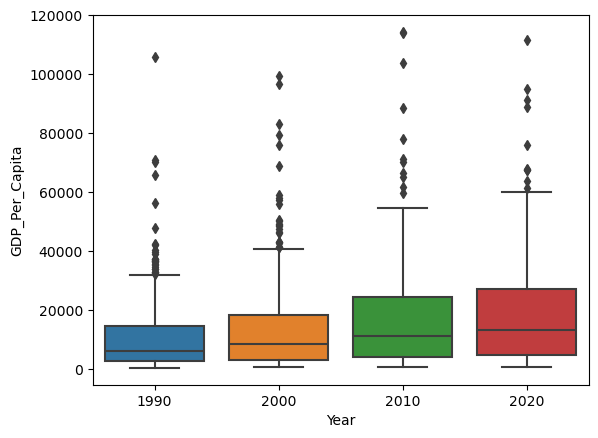

In [103]:
# create boxplot
sns.boxplot(x=gdp_decades["Year"], y=gdp_decades["GDP_Per_Capita"])
plt.show()

<Axes: xlabel='Year', ylabel='GDP_Per_Capita'>

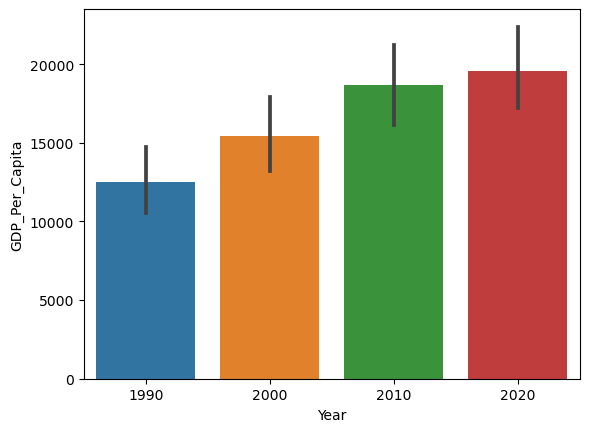

In [104]:
# create a barplot
sns.barplot(
    x="Year",
    y="GDP_Per_Capita",
    data=gdp_decades)

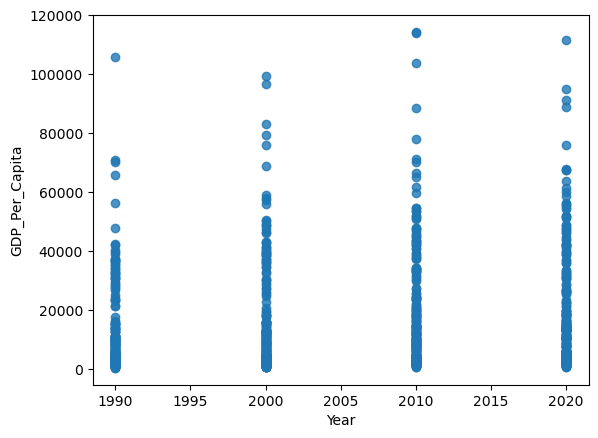

In [105]:
# create a scatter plot
sns.regplot(x=gdp_decades["Year"], y=gdp_decades["GDP_Per_Capita"], fit_reg=False)
plt.show()

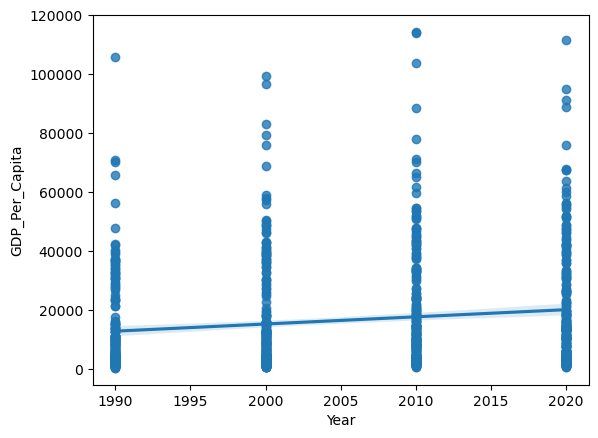

In [106]:
# create a scatter plot with trend line.
sns.regplot(x=gdp_decades["Year"], y=gdp_decades["GDP_Per_Capita"])
plt.show()

# Answer: GDP values have increased over time. The scatter plots do not show this well since it is categoried into specefic years. The bar plot seemed to show the best representation of this increase.

# Q11

# Which country was the first to have a GDP per capita greater than $100,000?

In [107]:
#find GDP per capitas above $100,000.
gdp_over_100k = gdp_df[gdp_df["GDP_Per_Capita"] > 100000]

In [108]:
gdp_over_100k.loc[gdp_over_100k["Year"].idxmin()]

Country           United Arab Emirates
Year                              1990
GDP_Per_Capita           105893.626059
Name: 7302, dtype: object

# Answer: United Arab Emirates

# Q12

# Which country had the highest GDP per capita in 2020? Create a plot showing how this country's GDP per capita has changed over the timespan of the dataset.

In [109]:
#find country with highest GDP per capita in 2020.
gdp_per_cap2020.loc[gdp_per_cap2020["GDP_Per_Capita"].idxmax()]

Country              Luxembourg
Year                       2020
GDP_Per_Capita    111751.314751
Name: 4148, dtype: object

In [110]:
#create variable with just Luxembourg's GDP.
gdp_luxembourg = gdp_df[gdp_df["Country"] == "Luxembourg"]

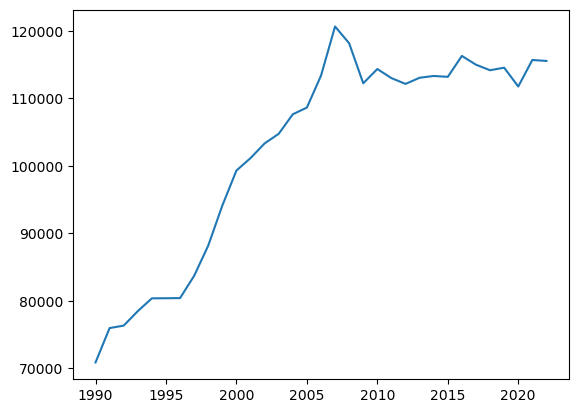

In [111]:
#create graph based on Luxembourg's GDP.
plt.plot("Year","GDP_Per_Capita", data = gdp_luxembourg)
plt.show()

# Answer: Luxembourg's GDP increased significantly from 1990 to early 2000's, and has since leveled out.

# Q13

# Which country had the lowest GDP per capita in 2020? Create a plot showing how this country's GDP per capita has changed over the timespan of the dataset. Bonus question: Is it true in general that coutries had a higher GDP per capita in 2020 than in 1990? Which countries had lower GDP per capita in 2020 than in 1990?

In [112]:
#find country with lowest GDP per capita in 2020.
gdp_per_cap2020.loc[gdp_per_cap2020["GDP_Per_Capita"].idxmin()]

Country              Burundi
Year                    2020
GDP_Per_Capita    711.355263
Name: 973, dtype: object

In [113]:
#create variable with just Burundi's GDP.
gdp_burundi = gdp_df[gdp_df["Country"] == "Burundi"]

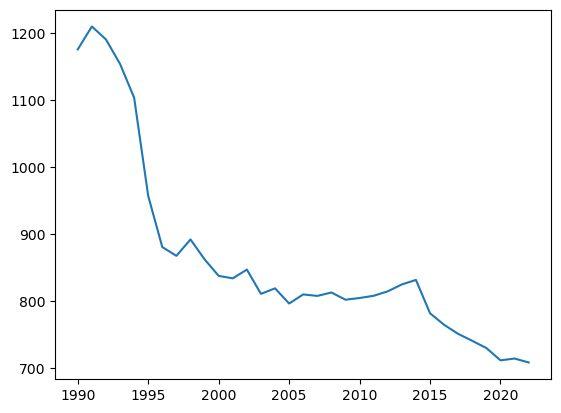

In [114]:
#create graph based on Burundi's GDP.
plt.plot("Year","GDP_Per_Capita", data = gdp_burundi)
plt.show()

#13 Bonus: Is it true in general that coutries had a higher GDP per capita in 2020 than in 1990? Which countries had lower GDP per capita in 2020 than in 1990?

# Q14

# Read in the internet use dataset into a DataFrame named internet_df. You will likely get errors when doing this. Check the arguments for the read_csv function to find ones that can help correct the errors (https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html) Once you are able to read it in, take per a look at the top and bottom few rows to make sure that it has been read in correctly. Also, check the datatypes of the columns.

In [115]:
internet_df = pd.read_csv('../data/internet_use.csv',nrows=4495)

In [116]:
internet_df

,Country or Area,Year,Value,Value Footnotes
0,Afghanistan,2014,6.390000,NaN
1,Afghanistan,2013,5.900000,NaN
2,Afghanistan,2012,5.454545,NaN
3,Afghanistan,2011,5.000000,NaN
4,Afghanistan,2010,4.000000,NaN
...,...,...,...,...
4490,Zimbabwe,1997,0.033080,NaN
4491,Zimbabwe,1996,0.016790,NaN
4492,Zimbabwe,1995,0.007684,NaN
4493,Zimbabwe,1994,0.001739,NaN


# Q15

# Drop the Value Footnotes column and rename the remaining three to 'Country', 'Year', and 'Internet_Users_Pct'.

In [117]:
#drop column
del internet_df['Value Footnotes']

In [118]:
internet_df.head()

,Country or Area,Year,Value
0,Afghanistan,2014,6.390000
1,Afghanistan,2013,5.900000
2,Afghanistan,2012,5.454545
3,Afghanistan,2011,5.000000
4,Afghanistan,2010,4.000000


In [119]:
#rename columns
internet_df.columns = ['Country', 'Year', 'Internet_Users_Pct']

In [120]:
internet_df.head()

,Country,Year,Internet_Users_Pct
0,Afghanistan,2014,6.390000
1,Afghanistan,2013,5.900000
2,Afghanistan,2012,5.454545
3,Afghanistan,2011,5.000000
4,Afghanistan,2010,4.000000


# Q16

# Look at the number of observations in this dataset per year. What do you notice?

In [121]:
internet_df.groupby(["Year"]).count()

,Country,Internet_Users_Pct
Year,,
1960,7,7
1965,7,7
1970,7,7
1975,7,7
1976,7,7
1977,7,7
1978,7,7
1979,7,7
1980,7,7


# Answer: Observations increased in 1990.

# Q17

# What is the first year to have a non-zero internet users percentage value?

In [122]:
# create df with internet users above 0 pct.
internet_above0 = internet_df[internet_df["Internet_Users_Pct"] > 0]

In [123]:
internet_above0

,Country,Year,Internet_Users_Pct
0,Afghanistan,2014,6.390000
1,Afghanistan,2013,5.900000
2,Afghanistan,2012,5.454545
3,Afghanistan,2011,5.000000
4,Afghanistan,2010,4.000000
...,...,...,...
4489,Zimbabwe,1998,0.081648
4490,Zimbabwe,1997,0.033080
4491,Zimbabwe,1996,0.016790
4492,Zimbabwe,1995,0.007684


In [124]:
#find first year
internet_above0["Year"].min()

1990

# Answer: 1990

# Q18

# How does the distribution of internet users percent differ for 2000 and 2014?

In [125]:
#make a df with just years 2000 and 2014
internet_2000_2014 = internet_df[(internet_df["Year"] == 2000) | (internet_df["Year"] == 2014)]

In [126]:
internet_2000_2014.head

<bound method NDFrame.head of           Country  Year  Internet_Users_Pct
0     Afghanistan  2014            6.390000
15        Albania  2014           60.100000
29        Albania  2000            0.114097
36        Algeria  2014           18.090000
50        Algeria  2000            0.491706
...           ...   ...                 ...
4445        Yemen  2000            0.082500
4451       Zambia  2014           17.340000
4465       Zambia  2000            0.191072
4473     Zimbabwe  2014           19.890000
4487     Zimbabwe  2000            0.401434

[401 rows x 3 columns]>

Text(0.5, 0, 'Internet_Users_Pct')

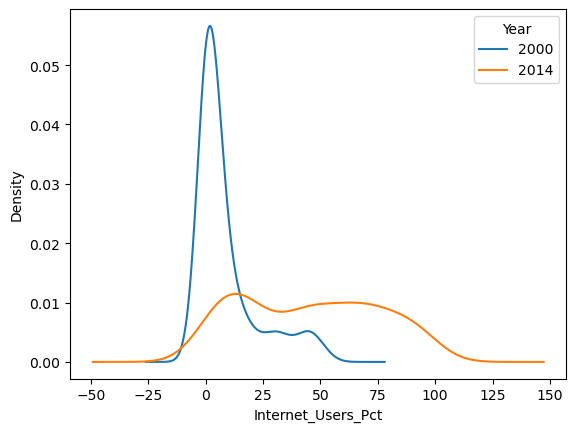

In [127]:
#plot distrobution of internet pct use by year.
internet_2000_2014.groupby('Year')['Internet_Users_Pct'].plot(kind='kde')
plt.legend([2000,2014],title='Year')
plt.xlabel('Internet_Users_Pct')

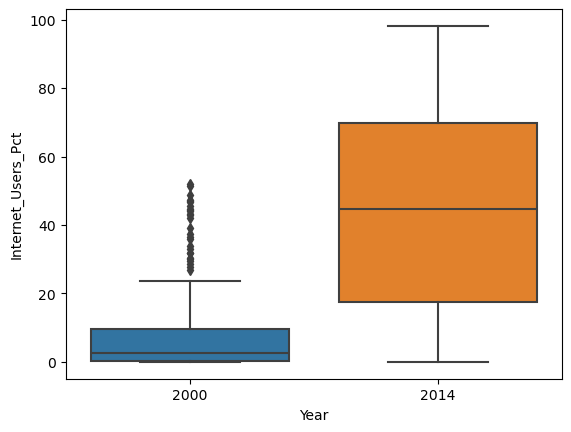

In [131]:
#better visual using boxplot.
sns.boxplot(x=internet_2000_2014["Year"], y=internet_2000_2014["Internet_Users_Pct"])
plt.show()

# Q19

# For how many countries was the percentage of internet users below 5% in 2014?

In [ ]:
# make df for year 2014
internet_df_2014 = internet_df[internet_df['Year'] == 2014]

In [ ]:
internet_df_2014.head

In [ ]:
#count number of rows where Pct is under 5%
internet_df_2014[internet_df_2014['Internet_Users_Pct'] < 5.0].shape[0]

# Answer: 16

# Q20

# Merge the two DataFrames to one. Do this in a way that keeps all rows from each of the two DataFrames. Call the new DataFrame gdp_and_internet_use. Look at the first and last few rows to confirm that it merged correctly.

In [ ]:
#merge the dataframes using concat.
gdp_and_internet_use = gdp_df.merge(internet_df, how='outer', on=('Country','Year'))

In [ ]:
gdp_and_internet_use.head

# Answer: code above, 12157 rows on new df.

# Q21

# Find the three countries with the highest internet users percentage in 2014. Use a seaborn FacetGrid (https://seaborn.pydata.org/generated/seaborn.FacetGrid.html) to compare how the GDP per capita has changed over time for these three countries. What do you notice?

In [ ]:
#set year to 2014 and sort Internet User Pct by top 3.
gdp_and_internet_use_2014 = gdp_and_internet_use[gdp_and_internet_use['Year'] == 2014]
top3_2014 = gdp_and_internet_use_2014.sort_values(['Internet_Users_Pct'], ascending=False).head(3)

In [ ]:
#create a list
top_3_countries = ['Iceland', 'Bermuda', 'Norway']

In [ ]:
top_3_countries

In [ ]:
gdp_df_top3 = gdp_df[gdp_df["Country"].isin(top_3_countries)]

In [ ]:
gdp_df_top3.head

In [ ]:
top3_gdp_grid = sns.FacetGrid(gdp_df_top3, col="Country")
top3_gdp_grid.map(sns.scatterplot, "Year","GDP_Per_Capita")

# Answer: GDP per Capita generally increases but dipped for Bermuda.

# Q22

# Subset gdp_and_internet_use to just the year 2014. Save this as a new dataframe named gdp_and_internet_use_2014.

In [ ]:
#already did in Q21. Code is below.
gdp_and_internet_use_2014 = gdp_and_internet_use[gdp_and_internet_use['Year'] == 2014]

# Answer: code above

# Q23

# Create a plot which compares Internet Users Percentage and GDP per Capita for the year 2014. What do you notice from this plot? If you see any unusual points, investigate them.

In [ ]:
#make a scatterplot.
sns.regplot(x=gdp_and_internet_use_2014["Internet_Users_Pct"], y=gdp_and_internet_use_2014['GDP_Per_Capita'])

In [ ]:
outlier_group = gdp_and_internet_use_2014[gdp_and_internet_use_2014['GDP_Per_Capita'] > 80000]

In [ ]:
outlier_group.head()

# Answer: 4 countries had GDP above 80k. 1 was not shown in the graph because it did not have any information for Internet User Percentage.

# Q24

# Stretch Question: Use the qcut function from pandas (https://pandas.pydata.org/docs/reference/api/pandas.qcut.html) to divide countries in gdp_per_capita_2014 into three groups based on their GDP per capita values. Label these groups as "Low", "Medium", and "High". Put these labels in a new column, named "GDP_group".

In [132]:
#plug in variables for qcut
gdp_and_internet_use_2014.loc[:,'GDP_group'] = pd.qcut(gdp_and_internet_use_2014[('GDP_Per_Capita')], 3, labels=['Low','Medium','High'])
gdp_and_internet_use_2014.head()

,Country,Year,GDP_Per_Capita,Internet_Users_Pct,GDP_group
7,Afghanistan,2014,2144.449634,6.39,Low
28,Africa Eastern and Southern,2014,3642.875373,NaN,Low
61,Africa Western and Central,2014,4146.994622,NaN,Low
94,Albania,2014,11586.817446,60.10,Medium
127,Algeria,2014,11561.259795,18.09,Medium


# Answer: Above code

# Q25

# Stretch Question: How does the median internet users percentage compare for the three gdp groups?

In [134]:
median_groups = gdp_and_internet_use_2014.groupby(['GDP_group']).median('Internet_Users_Pct')
median_groups

C:\Users\mcnut\AppData\Local\Temp\ipykernel_6928\1547688432.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  median_groups = gdp_and_internet_use_2014.groupby(['GDP_group']).median('Internet_Users_Pct')


,Year,GDP_Per_Capita,Internet_Users_Pct
GDP_group,,,
Low,2014.0,3378.364591,10.6
Medium,2014.0,12164.228037,43.4
High,2014.0,37454.808489,78.7


# Answer:median Internet user pct increases  with GDP.